In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install easyocr
!pip install opencv-python
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install tqdm
!pip install pyyaml
!pip install scipy
!pip install ultralytics

Looking in indexes: https://download.pytorch.org/whl/cu118
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.6/286.6 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.5/913.5 kB 22.2 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/WongKinYiu/yolov9.git
%cd yolov9

Cloning into 'yolov9'...
remote: Enumerating objects: 781, done.
remote: Total 781 (delta 0), reused 0 (delta 0), pack-reused 781 (from 1)
Receiving objects: 100% (781/781), 3.27 MiB | 7.46 MiB/s, done.
Resolving deltas: 100% (331/331), done.
/content/yolov9


In [ ]:
!unzip /content/yolov9/licence-palte-detection.v6i.yolov9.zip -d dataset

Archive:  /content/yolov9/licence-palte-detection.v6i.yolov9.zip
replace dataset/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!python train.py --img 640 --batch 16 --epochs 100 --data /content/yolov9/dataset/data.yaml --weights /content/yolov9-s-converted.pt  --cfg models/detect/gelan-c.yaml --name gelan-c --hyp data/hyps/hyp.scratch-high.yaml --min-items 0 --close-mosaic 15

2025-01-25 18:27:09.670438: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-25 18:27:09.700593: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-25 18:27:09.711023: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-25 18:27:09.735822: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-25 18:27:11.390029: W tensorflow/compiler/tf2

In [ ]:
!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data dataset/data.yaml \
--weights /content/yolov9/runs/train/gelan-c5/weights/best.pt

val: data=dataset/data.yaml, weights=['/content/yolov9/runs/train/gelan-c5/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be execu

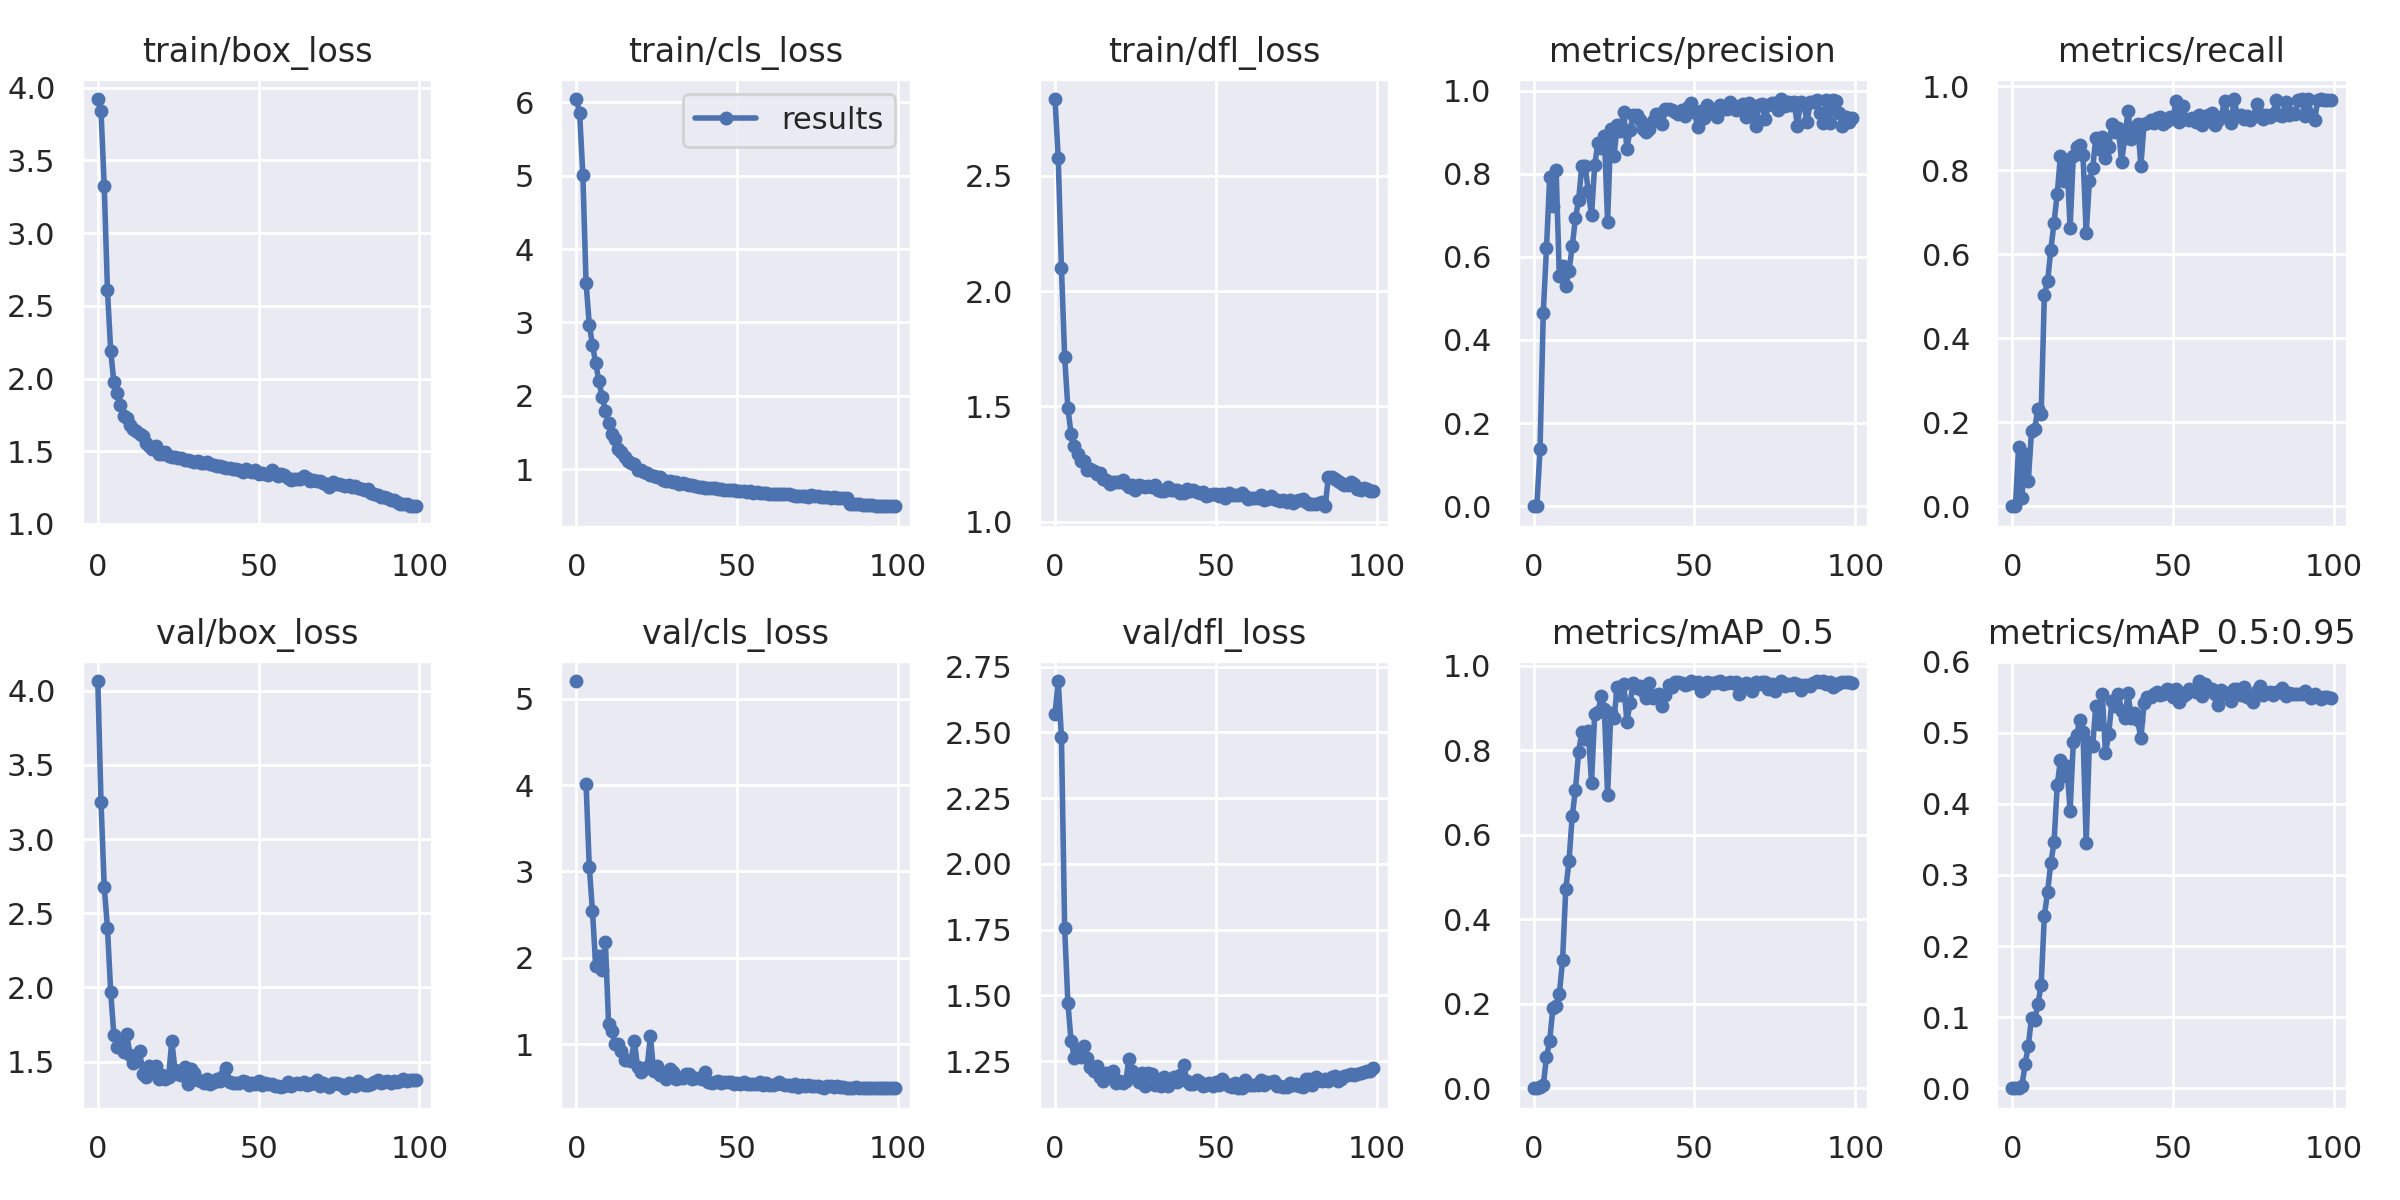

In [ ]:
from IPython.display import Image

Image(filename=f"/content/yolov9/runs/train/gelan-c5/results.png", width=1000)

In [ ]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights /content/yolov9/runs/train/gelan-c5/weights/best.pt \
--source /content/yolov9/dataset/test/images

detect: weights=['/content/yolov9/runs/train/gelan-c5/weights/best.pt'], source=/content/yolov9/dataset/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a futu

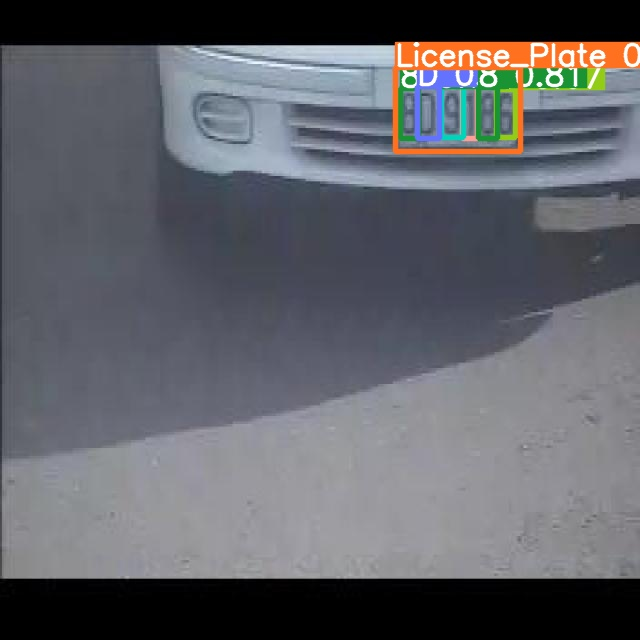

In [ ]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'/content/yolov9/runs/detect/exp/AC-105-_jpg.rf.e299dd27ef24ee40b197115c5c9f7ffb.jpg')[:2]:
      display(Image(filename=image_path, width=600))